<a href="https://colab.research.google.com/github/wenjian98/lecture-1/blob/main/HW_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Data/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

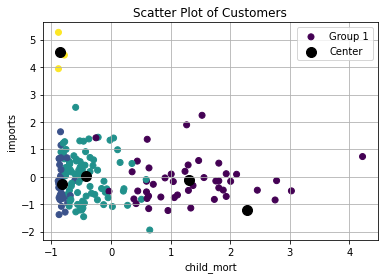

In [ ]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [ ]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters=k,n_init=30,init = "random")
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

In [ ]:
# Calculate the WCSSs
WCSSs = [KMeans(n_clusters=k,n_init=30,init = "random").fit(X_scaled).inertia_ for k in Ks]

In [ ]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 632.3942572883417,
 578.0360531368046,
 498.7349801286374,
 470.8702091210438,
 436.23606184293163,
 393.5907079978798,
 371.4845252584298,
 350.9235106365487,
 337.3837976319116,
 321.8991360223415]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

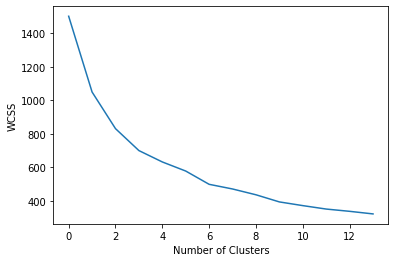

In [ ]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

I would choose k=2 to be the clusters because developing and developed countries are a common classfication method. And it is also esay to check.

In [ ]:
k = 2 
kmeans = KMeans(n_clusters=k,n_init=30,init = "random").fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [ ]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [ ]:
output = pd.concat([preds,X,names],axis =1)

In [ ]:
output.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda


In [ ]:
print("Cluster 1:")
list(output[output[0] == 0]["country"])

Cluster 1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [ ]:
print("Cluster 2:")
list(output[output[0] == 1]["country"])

Cluster 2:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

We can find that cluster 1 are mostly developing countries and cluster 2 are mostly developed countries. However, we can find the classification is not that good and maybe we should adjust the k we use.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [ ]:
Q7DF = pd.concat([preds,X],axis=1)

In [ ]:
Q7DF

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
Q7DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [ ]:
Q7DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# Q7.) Write an observation about the descriptive statistics.

It is apparent that developing countries have significantly higher rates of child mortality and lower levels of both exports and imports compared to developed countries. Additionally, the income disparity between developed and developing nations is striking, with developed countries enjoying an income that is five times higher than that of their developing counterparts. Developing countries also have a notably higher total fertility rate, indicating a greater likelihood of childbirth. In terms of economic indicators, developed nations tend to have stronger GDPs and lower inflation rates. Furthermore, developed countries generally have better-established healthcare systems and, consequently, higher life expectancies.